## Importing library and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Deep learning/Dataset/GoogleFit.csv')
test = pd.read_csv('/content/drive/MyDrive/Deep learning/Dataset/Daily activity metrics.csv')

In [ ]:
train.head(10)

,Date,Calories,Distance,Low_latitude,Low_longitude,High_latitude,High_longitude,Average_speed,Max_speed,Min_speed,Step_count,Average_weight,Max_weight,Min_weight,Move,Heart_point,Heart_minutes,Biking_duration,Inactive_duration,Walking_duration,Running_duration
0,09-01-19,2009.732700,7372.049643,12.983699,80.227514,12.989529,80.236091,1.018094,8.620000,0.113022,12716,NaN,NaN,NaN,151,44.0,44.0,NaN,75266222.0,8753841.0,NaN
1,09-02-19,2041.791085,7633.338808,12.983831,80.223028,12.989600,80.236139,0.789021,6.580000,0.050601,10548,NaN,NaN,NaN,159,55.0,55.0,1918502.0,74089157.0,7288987.0,NaN
2,09-03-19,1876.149418,5140.428308,12.983987,80.226966,12.991754,80.235849,0.725031,3.440000,0.249939,10255,NaN,NaN,NaN,119,20.0,20.0,NaN,76647141.0,6306102.0,NaN
3,09-04-19,1844.911027,4988.634070,12.984084,80.230325,12.990601,80.235497,0.612671,1.722482,0.272343,9016,NaN,NaN,NaN,105,18.0,18.0,NaN,74344589.0,5729432.0,NaN
4,09-05-19,2195.678803,11043.779040,12.978630,80.227057,12.991766,80.237433,0.770244,7.000000,0.105016,12070,NaN,NaN,NaN,200,83.0,83.0,3760724.0,71333463.0,8129991.0,NaN
5,09-06-19,2345.289397,17741.588480,12.975647,80.227592,12.991398,80.266664,0.800691,8.000000,0.099408,15108,NaN,NaN,NaN,265,95.0,94.0,4540081.0,62807580.0,10045818.0,NaN
6,09-07-19,2030.342427,9360.556404,12.984065,80.223292,12.990993,80.238017,0.807562,5.922678,0.050902,8860,NaN,NaN,NaN,158,64.0,64.0,2760093.0,75093085.0,6178829.0,NaN
7,09-08-19,2054.223215,8687.392848,12.983893,80.211745,13.082810,80.262833,1.286486,34.000000,0.019649,12410,NaN,NaN,NaN,178,61.0,61.0,1788681.0,66994785.0,7648812.0,NaN
8,09-09-19,2149.296599,8644.655754,12.983895,80.217867,12.990996,80.235658,0.764365,13.000000,0.021920,6798,NaN,NaN,NaN,191,92.0,92.0,5857009.0,71196923.0,5012775.0,NaN
9,09-10-19,2182.886665,10730.159510,12.981148,80.227216,12.991208,80.237936,0.656689,3.820000,0.080507,5351,NaN,NaN,NaN,185,115.0,115.0,7312605.0,71224195.0,4091613.0,NaN


In [ ]:
test.columns

Index(['Date', 'Average weight (kg)', 'Max weight (kg)', 'Min weight (kg)',
       'Calories (kcal)', 'Heart Points', 'Heart Minutes',
       'Low latitude (deg)', 'Low longitude (deg)', 'High latitude (deg)',
       'High longitude (deg)', 'Step count', 'Distance (m)',
       'Average speed (m/s)', 'Max speed (m/s)', 'Min speed (m/s)',
       'Move Minutes count', 'Biking duration (ms)', 'Inactive duration (ms)',
       'Walking duration (ms)', 'Running duration (ms)',
       'Circuit training duration (ms)'],
      dtype='object')

In [ ]:
train.describe()

,Calories,Distance,Low_latitude,Low_longitude,High_latitude,High_longitude,Average_speed,Max_speed,Min_speed,Step_count,Average_weight,Max_weight,Min_weight,Move,Heart_point,Heart_minutes,Biking_duration,Inactive_duration,Walking_duration,Running_duration
count,366.000000,365.000000,238.000000,238.000000,238.000000,238.000000,366.000000,366.000000,366.000000,366.000000,0.0,0.0,0.0,366.000000,294.000000,294.000000,1.910000e+02,3.650000e+02,3.650000e+02,7.500000e+01
mean,1835.214947,4810.123123,13.889510,78.784630,13.916141,78.808591,0.692132,5.754884,0.183584,6096.439891,NaN,NaN,NaN,101.989071,38.993197,38.948980,3.175053e+06,7.265569e+07,3.709550e+06,1.787124e+05
std,189.772429,3040.825941,1.736172,2.568267,1.744408,2.570004,0.812580,9.111019,0.097400,3063.866088,NaN,NaN,NaN,53.649342,32.868857,32.881016,1.979019e+06,8.890072e+06,2.233374e+06,3.080528e+05
min,1355.707450,485.193509,10.782374,73.720718,10.958456,73.947797,0.336518,0.670411,0.000000,1219.000000,NaN,NaN,NaN,7.000000,1.000000,1.000000,7.286300e+04,1.329120e+07,2.588360e+05,1.429900e+04
25%,1694.402865,2736.571182,12.983810,79.796897,12.990956,80.233082,0.450269,1.676575,0.088567,3918.750000,NaN,NaN,NaN,64.250000,11.000000,11.000000,1.672325e+06,7.100670e+07,2.255896e+06,6.140500e+04
50%,1803.765904,4182.199020,12.984047,80.227002,12.991954,80.235950,0.523461,3.174675,0.247894,5541.000000,NaN,NaN,NaN,95.000000,30.000000,30.000000,2.853419e+06,7.482039e+07,3.231907e+06,9.209200e+04
75%,1936.212027,6111.382125,12.986809,80.230924,13.071079,80.237413,0.667268,5.465365,0.255029,7385.750000,NaN,NaN,NaN,133.000000,61.000000,61.000000,4.392447e+06,7.736946e+07,4.617388e+06,1.539920e+05
max,2522.926964,23502.031700,18.998387,80.235076,19.606444,80.275746,9.797274,81.923134,0.510000,21925.000000,NaN,NaN,NaN,302.000000,151.000000,151.000000,9.598403e+06,8.363938e+07,1.485768e+07,2.337409e+06


## Spliting dataset into dependent and independent variables

In [ ]:
print(train.columns)
features_train = [ 'Heart_point', 'Heart_minutes', 'Step_count', 'Distance',  'Average_speed', 'Move ', 'Walking_duration']
train_X = train[features_train]

train_y = train['Calories']
train_y = train_y.values.reshape(-1, 1)
print(train_y.shape)

Index(['Date', 'Calories', 'Distance', 'Low_latitude', 'Low_longitude',
       'High_latitude', 'High_longitude', 'Average_speed', 'Max_speed',
       'Min_speed', 'Step_count', 'Average_weight', 'Max_weight', 'Min_weight',
       'Move ', 'Heart_point', 'Heart_minutes', 'Biking_duration',
       'Inactive_duration', 'Walking_duration', 'Running_duration'],
      dtype='object')
(366, 1)


In [ ]:
features_test = ['Heart Points', 'Heart Minutes', 'Step count', 'Distance (m)', 'Average speed (m/s)', 'Move Minutes count',  
                  'Walking duration (ms)']
test_X = test[features_test]
test_y = test['Calories (kcal)']
test_y = test_y.values.reshape(-1, 1)
print(test_y.shape)

(110, 1)


In [ ]:
print(train_X.shape)
print(train_y.shape)

(366, 7)
(366, 1)


In [ ]:
test_X.shape

(110, 7)

In [ ]:
train_X.isna().sum()

Heart_point         72
Heart_minutes       72
Step_count           0
Distance             1
Average_speed        0
Move                 0
Walking_duration     1
dtype: int64

## Filling missing values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train_X)
train_X = imputer.transform(train_X)
test_X = imputer.transform(test_X)

# for dependent features
train_y = imputer.fit_transform(train_y)
test_y = imputer.transform(test_y)

In [ ]:
print(train_X)

[[4.40000000e+01 4.40000000e+01 1.27160000e+04 ... 1.01809424e+00
  1.51000000e+02 8.75384100e+06]
 [5.50000000e+01 5.50000000e+01 1.05480000e+04 ... 7.89021149e-01
  1.59000000e+02 7.28898700e+06]
 [2.00000000e+01 2.00000000e+01 1.02550000e+04 ... 7.25030889e-01
  1.19000000e+02 6.30610200e+06]
 ...
 [9.00000000e+00 9.00000000e+00 5.25300000e+03 ... 4.82997010e-01
  5.80000000e+01 2.48927200e+06]
 [1.30000000e+01 1.30000000e+01 6.88000000e+03 ... 4.54864551e-01
  7.20000000e+01 3.70038200e+06]
 [1.60000000e+01 1.40000000e+01 7.10400000e+03 ... 3.88990860e-01
  8.60000000e+01 3.23190700e+06]]


## Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
train_X = scalar.fit_transform(train_X)
test_X = scalar.transform(test_X)
print(scalar.mean_)

[3.89931973e+01 3.89489796e+01 6.09643989e+03 4.81012312e+03
 6.92132407e-01 1.01989071e+02 3.70954994e+06]


In [ ]:
np.amin(train_X)

-1.772978006380985

## Building the ANN

In [ ]:
# Initiling ANN
ann = tf.keras.models.Sequential()

In [ ]:
# Input and first hidden layer
ann.add(tf.keras.layers.Dense(units=60, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))


In [ ]:
# second hidden layer
ann.add(tf.keras.layers.Dense(units=60, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))


In [ ]:
# Third hidden layer
ann.add(tf.keras.layers.Dense(units=60, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))


In [ ]:
# Forth hidden layer
ann.add(tf.keras.layers.Dense(units=60, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))


In [ ]:
# Fifth hidden layer
ann.add(tf.keras.layers.Dense(units=60, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))


In [ ]:
# Adding output layer
ann.add(tf.keras.layers.Dense(units=1))

## Training ANN

In [ ]:
# Compile the ANN
ann.compile(optimizer='Adamax', loss='mean_squared_error', metrics=['mae','mse','mape'])

In [ ]:
# Train ANN
history = ann.fit(train_X, train_y, batch_size=1, epochs=200)

Epoch 1/200
366/366 [==============================] - 1s 1ms/step - loss: 3183943.2643 - mae: 1759.6287 - mse: 3183941.9693 - mape: 95.6408
Epoch 2/200
366/366 [==============================] - 0s 1ms/step - loss: 294262.8309 - mae: 441.6600 - mse: 294261.2456 - mape: 24.3116
Epoch 3/200
366/366 [==============================] - 0s 1ms/step - loss: 160529.8261 - mae: 322.7481 - mse: 160528.3675 - mape: 17.4733
Epoch 4/200
366/366 [==============================] - 0s 1ms/step - loss: 147018.7911 - mae: 311.2304 - mse: 147017.2827 - mape: 16.8511
Epoch 5/200
366/366 [==============================] - 0s 1ms/step - loss: 108430.6480 - mae: 265.8418 - mse: 108429.1346 - mape: 14.4051
Epoch 6/200
366/366 [==============================] - 0s 1ms/step - loss: 73270.9246 - mae: 216.6638 - mse: 73269.4023 - mape: 11.6887
Epoch 7/200
366/366 [==============================] - 0s 1ms/step - loss: 46859.6804 - mae: 164.1079 - mse: 46858.1483 - mape: 8.7825
Epoch 8/200
366/366 [===============

In [ ]:
test_loss = ann.evaluate(test_X, test_y)

4/4 [==============================] - 0s 3ms/step - loss: 147664.4688 - mae: 268.0793 - mse: 147663.1562 - mape: 50.9557


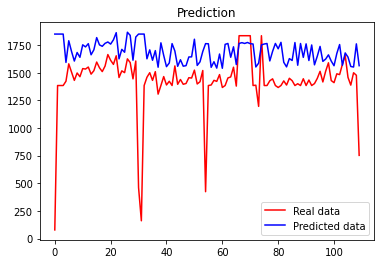

In [ ]:
y_pred = ann.predict(test_X)

plt.plot(test_y, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

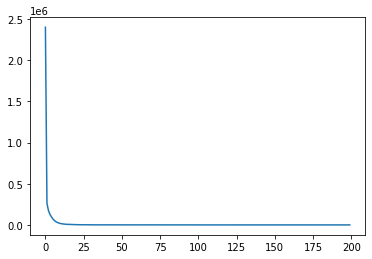

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
ann.save('my_model_0.9.h5')

In [ ]:
loded_model = tf.keras.models.load_model('my_model_0.9.h5')

In [ ]:
loded_model.evaluate(test_X, test_y)

4/4 [==============================] - 0s 3ms/step - loss: 147664.4688 - mae: 268.0793 - mse: 147663.1562 - mape: 50.9557


[147664.46875, 268.0793151855469, 147663.15625, 50.955684661865234]

In [ ]:
loded_model.predict(test_X)

array([[1850.052 ],
       [1850.052 ],
       [1850.052 ],
       [1850.052 ],
       [1593.5382],
       [1789.5801],
       [1692.574 ],
       [1606.0062],
       [1683.2544],
       [1639.889 ],
       [1752.8645],
       [1733.9763],
       [1763.0348],
       [1662.5891],
       [1708.0522],
       [1818.0853],
       [1752.2751],
       [1739.468 ],
       [1766.133 ],
       [1778.4071],
       [1759.3873],
       [1797.9604],
       [1862.6903],
       [1625.721 ],
       [1711.8843],
       [1685.6038],
       [1866.5673],
       [1838.3069],
       [1613.5369],
       [1823.0931],
       [1850.052 ],
       [1850.052 ],
       [1850.052 ],
       [1626.3015],
       [1707.0873],
       [1613.0051],
       [1700.3551],
       [1550.0846],
       [1770.7664],
       [1657.2865],
       [1555.2328],
       [1588.802 ],
       [1763.6602],
       [1696.604 ],
       [1558.2063],
       [1617.6844],
       [1559.4166],
       [1564.2179],
       [1642.6339],
       [1643.8898],
